# LSTM Misclassification (Manual Review)

With our LSTM networks, I took 200 samples for 1-star, 4-star, 5-star reviews that were misclassified (using Pandas sample method) and manually looked at the reviews that categorized them.

This notebook is broken down into 2 sections:
* first section is a [summary of misclassifications](#summary) for 1-star, 4-star, and 5-star reviews with graphs
* examples of each common misclassification categories for [1-star](#1-star), [4-star](#4-star), and [5-star](#5-star)


## Common Miscategorizations

(proportion of misclassification is ordered below - ie, 3-star, 2-star means most misclassified as 3-star then 2-star)

* 1-star reviews
    * [negative only](#negative_only1) misclassified as 3-star, 2-star, then 5-star
    * [has positives](#has_positive1) misclassified as 3-star, 2-star, then 5-star
* 4-star misclassified
    * [positively only](#positive_only4) misclassified as 5-star
    * [has negative](#has_negative4) misclassified as 5-star then 1-star
* 5-star misclassified as 4-stars or 3-stars
    * [positive only](#positive_only5) misclassified as 4-star
    * [has negative](#has_negative5) misclassified as 4-star, 3-star, then 1-star

## Explanation of Columns
| Name | Description |
|-----|--------------|
| index_orig | original index from the data file |
| true_all | Truth label |
| predict_15 | prediction from LSTM when only 1-star and 5-star reviews were trained |
| predict_145 | prediction from LSTM when only 1-star, 4-star, and 5-star reviews were trained |
| predict_1345 | prediction from LSTM when only 1-star, 3-star, 4-star, and 5-star reviews were trained |
| predict_all | prediction from LSTM when all star reviews were trained |
| review_body | original review body |
| out_of_vocab | list of words that were not in the gLove vocabulary - these would have been converted to 0 vectors as input into the model |
| review_body_train | review_body - out_of_vocab - final input into the model |
| misclassification_category | manual category by me |
| notes | any special notes about that review |

In [1]:
# import sibling utilities
import sys
sys.path.append('../')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.5)
pd.set_option("max_colwidth", 500)

RANDOM_STATE = 1
SAMPLES = 10
DISPLAY_COLS = ["index_orig", "true_all", "predict_15", "predict_145", "predict_1345", "predict_all", 
               "review_body_train", "notes"]

/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
REPORT_FILE = '../reports/lstm-misclassified-reviewed.xls'

report1 = pd.read_excel(REPORT_FILE, sheet_name="1-star")
report4 = pd.read_excel(REPORT_FILE, sheet_name="4-star")
report5 = pd.read_excel(REPORT_FILE, sheet_name="5-star")

<div id="summary" />

# Misclassification Summary

| category | description |
|----------|-------------|
| has_positive | used for 1-star reviews. review has some type of positive/neutral words regarding production - ie, it worked |
| has_negative | used for 4-star and 5-star reviews. review has both positive and negative context |
| positive_only | review only has positive sentiment |
| update | used only for 4-star reviews. some reviews have been amended with an update at the end - ie, product worked initially but then user found out something later that made them change the review. There is no attribute in the review except the word 'update:' that indicates this |
| mistake | in one case I found that in the review body, the text said the user rated the product 3.5 stars but the review star rating was 1 |
| ? | did not understand review |
| truncated | when training the model, we truncate the review at 100 words to keep our feature small. 90% of reviews are 100 words or less. In some cases, the review is really long and does not capture the entire sentiment of the review |
| invalid | generally the review is in a foreign language |
| neutral | review didn't have negative or neutral words - ie, gave one to family and meets expectation |




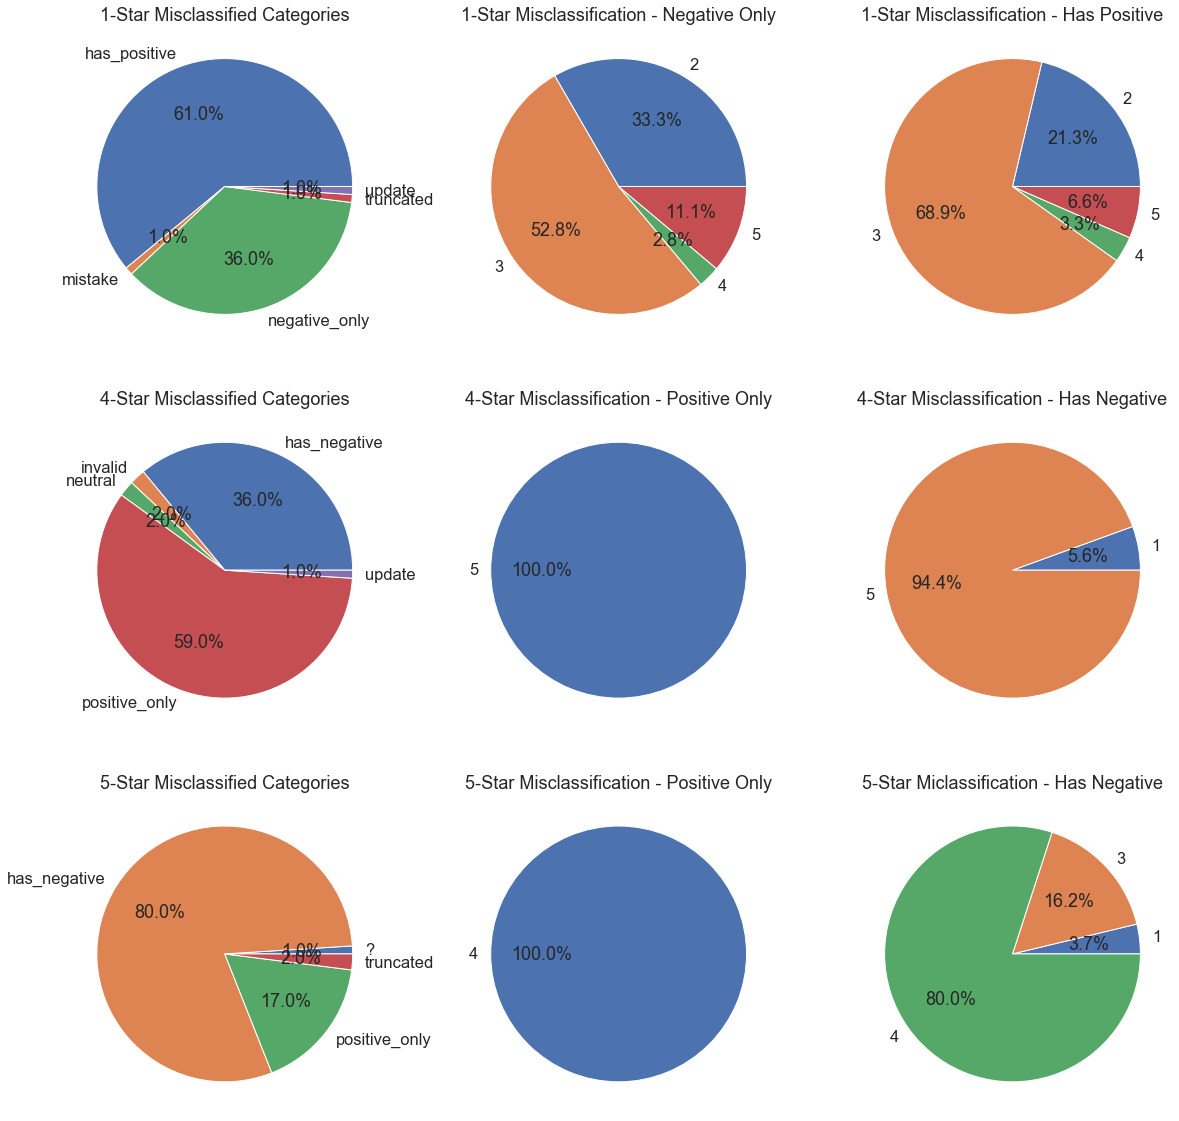

In [3]:
# 1-star reviews
report1_grouped = report1[["misclassification_category", "review_body_train"]].groupby("misclassification_category").count(). \
                        rename({"review_body_train": "total"}, axis=1).reset_index()
report1_grouped["percentage"] = report1_grouped.total / report1_grouped.total.sum()

# negative only
negative_only1 = report1[report1.misclassification_category == "negative_only"][["predict_all", "review_body_train"]]. \
                groupby("predict_all").count().reset_index().rename({"review_body_train": "total", "predict_all": "prediction"}, axis=1)
negative_only1["percentage"] = negative_only1.total / negative_only1.total.sum()

# has_positive
has_positive1 = report1[report1.misclassification_category == "has_positive"][["predict_all", "review_body_train"]]. \
                groupby("predict_all").count().reset_index().rename({"review_body_train": "total", "predict_all": "prediction"}, axis=1)
has_positive1["percentage"] = has_positive1.total / has_positive1.total.sum()


f, a = plt.subplots(3, 3, figsize=(20, 20))
_ = a[0][0].pie(report1_grouped.percentage, labels=report1_grouped.misclassification_category, autopct='%1.1f%%')
_ = a[0][0].set_title("1-Star Misclassified Categories")

_ = a[0][1].pie(negative_only1.percentage, labels=negative_only1.prediction, autopct='%1.1f%%')
_ = a[0][1].set_title("1-Star Misclassification - Negative Only")

_ = a[0][2].pie(has_positive1.percentage, labels=has_positive1.prediction, autopct='%1.1f%%')
_ = a[0][2].set_title("1-Star Misclassification - Has Positive")

# 4-star reviews
report4_grouped = report4[["misclassification_category", "review_body_train"]].groupby("misclassification_category").count(). \
                        rename({"review_body_train": "total"}, axis=1).reset_index()
report4_grouped["percentage"] = report4_grouped.total / report4_grouped.total.sum()

# positive only
positive_only4 = report4[report4.misclassification_category == "positive_only"][["predict_all", "review_body_train"]]. \
                groupby("predict_all").count().reset_index().rename({"review_body_train": "total", "predict_all": "prediction"}, axis=1)
positive_only4["percentage"] = positive_only4.total / positive_only4.total.sum()

# has negative
has_negative4 = report4[report4.misclassification_category == "has_negative"][["predict_all", "review_body_train"]]. \
                groupby("predict_all").count().reset_index().rename({"review_body_train": "total", "predict_all": "prediction"}, axis=1)
has_negative4["percentage"] = has_negative4.total / has_negative4.total.sum()



_ = a[1][0].pie(report4_grouped.percentage, labels=report4_grouped.misclassification_category, autopct='%1.1f%%')
_ = a[1][0].set_title("4-Star Misclassified Categories")

_ = a[1][1].pie(positive_only4.percentage, labels=positive_only4.prediction, autopct='%1.1f%%')
_ = a[1][1].set_title("4-Star Misclassification - Positive Only")

_ = a[1][2].pie(has_negative4.percentage, labels=has_negative4.prediction, autopct='%1.1f%%')
_ = a[1][2].set_title("4-Star Misclassification - Has Negative")

# 5-star
report5_grouped = report5[["misclassification_category", "review_body_train"]].groupby("misclassification_category").count(). \
                        rename({"review_body_train": "total"}, axis=1).reset_index()
report5_grouped["percentage"] = report5_grouped.total / report5_grouped.total.sum()

# positive only
positive_only5 = report5[report5.misclassification_category == "positive_only"][["predict_all", "review_body_train"]]. \
                groupby("predict_all").count().reset_index().rename({"review_body_train": "total", "predict_all": "prediction"}, axis=1)
positive_only5["percentage"] = positive_only5.total / positive_only5.total.sum()

# has negative
has_negative5 = report5[report5.misclassification_category == "has_negative"][["predict_all", "review_body_train"]]. \
                groupby("predict_all").count().reset_index().rename({"review_body_train": "total", "predict_all": "prediction"}, axis=1)
has_negative5["percentage"] = has_negative5.total / positive_only5.total.sum()

_ = a[2][0].pie(report5_grouped.percentage, labels=report5_grouped.misclassification_category, autopct='%1.1f%%')
_ = a[2][0].set_title("5-Star Misclassified Categories")

_ = a[2][1].pie(positive_only5.percentage, labels=positive_only5.prediction, autopct='%1.1f%%')
_ = a[2][1].set_title("5-Star Misclassification - Positive Only")

_ = a[2][2].pie(has_negative5.percentage, labels=has_negative5.prediction, autopct='%1.1f%%')
_ = a[2][2].set_title("5-Star Miclassification - Has Negative")

<div id="1-star"/>

# Misclassified 1-Star

* negatively only reviews are misclassified as 3-star, 2-star, 5-star, then 4-star
* reviews that have positive words are misclassified as 3-star, 2-star, 5-star, then 4-star

<div id="negative_only1" />

### 1-Star - Negative Only Samples

In [4]:
report1[report1.misclassification_category == "negative_only"][DISPLAY_COLS].sample(SAMPLES, random_state=RANDOM_STATE)

,index_orig,true_all,predict_15,predict_145,predict_1345,predict_all,review_body_train,notes
76,36591,1,NaN,NaN,3,2,nearly i to get your cards out of the slot my sliding door also opens randomly because there is nothing to keep it shut so once you use it a few ti ames it no longer stays closed i use it just as a basic case now because i do not trust it enough to keep my cards in it also the volume and power buttons are extremely hard to work with while the case is on you need to push very hard,NaN
98,303033,1,NaN,NaN,3,3,these seemed at first to be the logical choice for me at the gym and running but after a few days i had to send them back they are light weight but i never could get them to stay put seems there are 2 ways to wear them the one that involves those clips i never could get to work right and when i wore them the other way they just kept falling out especially when running,NaN
73,481500,1,NaN,NaN,3,3,the design was the same but it was upside down,NaN
7,602324,1,NaN,1.0,3,3,i think it seems to be defective do something weird to my appliance when plugged in to the adapter,NaN
62,916570,1,NaN,NaN,3,5,this review is for the new style soft strap monitor not the old style hard strap add me to the list of disappointed owners of this strap it worked fine for a couple of months then crashed and burned heart rate readings bounce around from to if i get a reading at all i have changed the battery hand washed it in warm water wet it prior to riding etc and still get erratic readings i completed a cli amb a little over a 3 4 of mile long that started at 4 went up as high as and averaged,NaN
58,153640,1,NaN,NaN,3,5,too many rules i prefer something si ampler,NaN
65,645676,1,NaN,NaN,3,2,the amount of ti ame it takes to recharge a battery is like 6 hours not worth it also someti ames it indicates that the battery is charged full but when you put it in your phone the battery is not really charged its like i rarely use it,NaN
68,406532,1,NaN,NaN,3,2,not useful the cross protrudes out so far that it has to lay flat on thr face of the phone i have never used it for this reason maybe if i needed something to just hold up for a pic but no protections and not for,NaN
74,710272,1,NaN,NaN,3,3,i really liked the item the price and its looks but it did not work for me i really wanted the item,NaN
71,202618,1,NaN,NaN,3,4,my arm hairs catch between the links i barely have any arm hairs but it manages to catch the few i have,NaN


<div id="has_positive1" />

### 1-Star - Has Positives Samples

In [5]:
report1[report1.misclassification_category == "has_positive"][DISPLAY_COLS].sample(SAMPLES, random_state=RANDOM_STATE)

,index_orig,true_all,predict_15,predict_145,predict_1345,predict_all,review_body_train,notes
59,123492,1,NaN,NaN,3,3,paint started chipping off after a couple of weeks great fit but obviously has some quality issue i see that other reviews have had the same problem they should pull this product until they fix the chipping issue,NaN
66,13867,1,NaN,NaN,3,3,it is ok but it is still kind of small on my wrist,NaN
4,717359,1,NaN,NaN,3,5,we revived the screen saver on ti ame great packaging opened it up and tried to put it on and it was not for my daughters galaxy phone,NaN
83,761248,1,NaN,NaN,3,2,so disappointed with this case i am not overly rough on my phone but it broke on the first drop on a rug it did however protect my phone so i guess it served it is purpose the case will now not close securely but i still used it for a a while my biggest complaint of this case is that the plastic on the back got very discolored with use and began to look gross within the first month i thought it was possibly from the oil on from my hands i was reaching for a reason but my,NaN
86,241320,1,NaN,NaN,3,3,i thought it was bigger but it is fine i guess,it's fine I guess
40,665988,1,NaN,NaN,3,3,the phone itself appeared to be off good quality however the battery is loose i actually have the batter taped onto the phone for it to stay powered on,NaN
50,271496,1,1.0,NaN,3,3,it worked but it doesnt completely stick to the screen it leaves an area of about 1 that doesnt stick down all the way,NaN
52,498956,1,NaN,NaN,3,2,it fit my phone just fine however the charger did not fit anymore with the case on really disappointed was really excited for this new case,NaN
63,593205,1,NaN,NaN,3,3,i received it thinking it was rubberized the case is plastic it is an okay cover however it should not be labeled as rubberized,NaN
56,93536,1,NaN,NaN,3,3,did not have it long at all it is cute but the paint on the back is chipping already i know this case will not last long,NaN


<div id="4-star"/>

# Misclssified 4-Star

* reviews that are only positive are misclassified as 5-star
* reviews that have negative words are misclassified as 5-star then 1-star

<div id="positive_only4" />

### 4-Star Positive Only Samples

In [6]:
report4[report4.misclassification_category == "positive_only"][DISPLAY_COLS].sample(SAMPLES, random_state=RANDOM_STATE)

,index_orig,true_all,predict_15,predict_145,predict_1345,predict_all,review_body_train,notes
79,561980,4,NaN,NaN,5.0,5,the fit is almost perfect i like the double protection on the corners of the phone i do believe this is where the phones are likely to have first i with the ground cannot beat the price,NaN
2,449391,4,NaN,5.0,5.0,5,very good product,NaN
58,681768,4,NaN,5.0,NaN,5,recommendation cool i love it in the future i buy new one my mother recommendation and my wife love this item,NaN
74,554133,4,NaN,NaN,5.0,5,my daughter wanted this cover for her phone and she loves it because she says it feels like it gives her phone more protection,NaN
64,503859,4,NaN,NaN,5.0,5,the screen protector is easy to apply and seems very durable in addition it is easy to remove and replace should you have an issue keep in mind that you must clean the screen thoroughly or the screen may not adhere as well as expected,NaN
57,384848,4,NaN,5.0,NaN,5,as described would buy again,NaN
62,215452,4,NaN,NaN,5.0,5,i love my chevron case and colors it fits the phone well,NaN
26,311421,4,NaN,5.0,NaN,5,good case,NaN
29,690988,4,NaN,NaN,5.0,5,i used this case at the office and a kays case on weekends and for traveling this gives the phone some protection while keeping it very sli am,NaN
87,276939,4,NaN,5.0,NaN,5,nice color good fit,NaN


<div id="has_negative4" />

### 4-Star - has negatives Samples

In [7]:
report4[report4.misclassification_category == "has_negative"][DISPLAY_COLS].sample(SAMPLES, random_state=RANDOM_STATE)

,index_orig,true_all,predict_15,predict_145,predict_1345,predict_all,review_body_train,notes
86,472775,4,NaN,5.0,5.0,5,i really was not sure what to expect with this but i absolutely love it now it charges my phone quickly and its so convenient the only issue i had is that i really wanted pink but it was not available when i ordered i love the flashlight luckily my phone has a wall port for charging so i connected it to that to charge it instead of to my computer but it will work either way great device,NaN
94,955572,4,NaN,NaN,5.0,5,i used garmin in australia and u s a i used tom tom in u s a and canada each have good and bad points tom tom screen will white out on you more often than garmin tom tom has more icons and permits up and downloading sharing with other drivers where safety cameras are located i like this feature so i put up with white out screens using tom tom more than my garmin,NaN
81,792791,4,NaN,4.0,5.0,5,nice case for the price it is my sons and he has not complained i would reorder this if i needed another,NaN
15,537428,4,NaN,5.0,NaN,5,the case is great i had to wait almost a month to get it tho when i was told up to 7 days,NaN
56,327243,4,NaN,5.0,NaN,5,they work really well i was disappointed the sound quality for the music was lacking but i got them for my audio lessons and they work fine for that i like being able to answer the phone when it rings not sure if i wud ever use that feature though update these are really comfortable and they do not fall out like most ear buds do i have used the phone answering feature and it works well i set these down for a few months and wen i decided to use them i forgot how to pair the device i,NaN
51,770699,4,NaN,NaN,5.0,5,great for those dam cases that are not built to let you charge your phone like the otterbox and the lifeproof,NaN
63,938870,4,NaN,5.0,NaN,5,if your not a fashionista but instead are looking for a good value in a case that offers basic protection for your iphone then look no further this case is not ugly but it leaves a lot to be desired in terms of looks what it does offer is basic protection against drops i have dropped it twice on a thin carpet covered concrete floor without any damage to my iphone and that is really all you should expect for in a sub case,NaN
72,24721,4,NaN,5.0,NaN,5,this is a very pretty case for my brand new iphone 6 it is beautiful but it provides absolutely no protection from drops or unfortunate accidents it is for looks and to prevent very minor scratches only fits perfectly,NaN
83,815251,4,NaN,5.0,NaN,5,after receiving a faulty item the snugg company got in touch with me and sent a replacement i was really i with the friendly and helpful service the new case fits my iphone 4 very snugg and looks great i really love the bamboo thanks heaps,NaN
78,881117,4,NaN,NaN,5.0,5,definitly worth the price yes there were a few more air bubbles then i am used to but i can live with it as for the reusable feature i have not tried it yet the package says to wash the adhesive side with water and soap and let it drip dry in a place free from lint or dust so that it does not stick to the protector and even if it does not work i have a second one,NaN


<div id="5-star"/>

# Misclssified 5-Star

* reviews that are positive only are misclassified as 4-star
* reviews have negative words are misclassified as 4-star, 3-star, then 1-star

<div id="has_negative5"/>

### 5-Star Reviews - Has Negative Samples

In [8]:
report5[report5.misclassification_category == "has_negative"][DISPLAY_COLS].sample(SAMPLES, random_state=RANDOM_STATE)

,index_orig,true_all,predict_15,predict_145,predict_1345,predict_all,review_body_train,notes
74,645992,5,NaN,NaN,4.0,4,i bought this for pri use on my motorcycle yes it does require additional mounting parts to use it on a motorcycle it came with all items pictured plus the screws and nuts to mount to the ram base i have a motorola droid razr maxx and the phone fits perfectly side to side without any case on the phone the aqua box is taller than the phone but not an issue no issues with the foam spacers which have adhesive to keep them from moving i have full usability with my phone in the aqua box the touch...,NaN
31,610203,5,5.0,4.0,NaN,4,good looking case not a lot of grip but it is great for the physical effects i am waiting to see how it does with dirt repellant,NaN
35,85309,5,NaN,4.0,NaN,3,i ordered it for a friend and she said it looks just like the picture but did not realize it was a hard case if there was mention of it being a hard case that would clarify things,NaN
82,419159,5,NaN,4.0,4.0,4,i gave this 5 stars because it is a great value for the money my only regret is that it does not have barometric pressure that however is my own fault and this little item is great if you are looking for wind temp and that is it great for the price not the greatest ease of use but it is not that tough to figure out this is such a minor negative that it does not really cause the loss of a star but should be noted here,NaN
52,789601,5,NaN,4.0,NaN,4,first of all i got mine from tmo under a business account though i think that my first hand experience with the phone should be helpful for those of you buying this phone from amazon after weeks of use here is what i gather for both major pros and cons pros 1 os the new hub peek and flow are superbly i it may feel weird at first but it takes no ti ame for me to master my phone the phone runs fast and does not get hot under heavy uses it gets slightly warm though on the back 2 browser this is...,NaN
53,590927,5,NaN,4.0,NaN,4,i get it for it is ok for use but right now i am not realize it is cheap but the quality is good,NaN
59,691778,5,5.0,NaN,4.0,4,i bought one at a local retailer in hk for slightly more than the amazon price exc p p for use in one of my cars which has an aux in jerry rigged into a clarion mcintosh system via the ipod adapter subaru legacy turbo a few days later i bought another one to use in my other car subaru brz with alpine head unit upgraded speakers and sub aux in as an option i have not done back to back testing and while streaming directly from an ipod should result in better sound i have found the sound qualit...,NaN
93,743713,5,1.0,4.0,3.0,4,with the addition of this case which combines a hard plastic clam shell with a soft rubber boot my lg opti amus exceed went from a svelte 7 of an inch to a brick like 7 in depth the large di and non slip feel makes this ideal for those on the clumsy side where once the phone is in ones hands it would be difficult to drop however from my experience dropping the phone always comes from some sort of transition either when the phone is being taken out or being put back into an accessory or chang...,NaN
43,126541,5,NaN,NaN,4.0,4,works quite well for the price be aware both your phone and the charger may heat up during intensive charging wired charging might be better in those cases,NaN
90,732170,5,NaN,4.0,NaN,3,this is a nice length cord not as thick as the cord i had on a previous cord purchased but does not seem to effect it in a negative way,NaN


<div id="positive_only5" />

### 5-Star Reviews - Positive Only Samples

In [9]:
report5[report5.misclassification_category == "positive_only"][DISPLAY_COLS].sample(SAMPLES, random_state=RANDOM_STATE)

,index_orig,true_all,predict_15,predict_145,predict_1345,predict_all,review_body_train,notes
46,924525,5,NaN,4.0,4.0,4,i was originally looking for a regular clear cover that i could put over my lg opti amus v that has a decorative skin on it i could not find any so i got this one hoping that even though there is a circular design it would be so subtle that it would not interfere with the skins design well it does not you can still see the circles but its really subtle i actually like it better than i thought i would this is not like a silicone case its smooth and does not catch lint at all it,NaN
88,720793,5,5.0,4.0,NaN,4,the case is very si ample sleek and stylish the rubber feels good and strong in the hand but is flexible enough to get it on and off the phone without a struggle the covers for the volume rocker and lock buttons are stiff which is great as many cases make you press them without meaning to overall a fine product for a great price,NaN
63,995580,5,NaN,NaN,4.0,4,i have been using this for about a month now and i am thoroughly i with the size functionality robustness before this i had a nokia tdma which i liked alot the key features that i like are 1 small with an internal antenna so it fits nicely in a pants pocket 2 has a speaker phone very useful because i prefer not put it the phone close to my head and the wired headphones is someti ames two cumbersome 3 has terrific pda functionality and comes with a cable ready for synchronization download the...,NaN
28,378944,5,5.0,4.0,5.0,4,received it in the mail yesterday came pretty fast i like it so far the phones os and clean execution of tasks but overall the cell is excellent but i cannot comment on the calling texting and data internet features until tomorrow but i know this phone will exceed my expectations and hopefully last a long ti ame if i do not drop it on a regular bases i recommend this cell to anyone looking for a go between or a replacement,NaN
62,643187,5,NaN,NaN,4.0,4,so far so good the battery pack works just fine i have had it a couple months and have been using the xm radio every day i still cannot rate its length of service of course but i am hoping thatll be fine too,NaN
83,12858,5,NaN,4.0,NaN,4,good sound reasonably good fit good buy for the money,NaN
48,652137,5,5.0,4.0,NaN,4,works well operates on tmobiles network and if you want data speeds make sure you are in a tmobile coverage area otherwise you will only get speeds,NaN
26,363028,5,5.0,4.0,NaN,4,nice case for the price i like that i can hold 3 4 cards comfortably in it i also like the black grey pink design it is cute without being too loud or flashy,NaN
91,640488,5,NaN,NaN,4.0,4,i cannot really say i noticed any major difference in charge ti ame but i really like that my charger now connects magnetically to the docking port on the bottom rather than physically plugging unplugging to the usb port it is a bit pricey but worth it,NaN
2,884040,5,NaN,4.0,NaN,4,since i was using my viewsonic also as the mobile it was necessory to find a good bluetooth headset as it is a hassle to always stay tethered to a 7 tablet so after considering few headsets i elected to buy this as it was reasonably priced from a reputed manufacturer and it is professional look after receiving the item i was quite facinated by the clarity of it is sound quality while i am not an audiophile i can say it is music quility is quite good it is not capable of delevering much bang ...,NaN
